In [20]:
%load_ext autoreload
%autoreload 2
%pdb off



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [21]:
import os
import sys
import deepchem as dc
from deepchem.utils.save import load_from_disk

current_dir = os.path.dirname(os.path.realpath("__file__"))
dataset_file = "desc_canvas_aug30.csv"
dataset = load_from_disk(dataset_file)
num_display=10
pretty_columns = (
    "[" + ",".join(["'%s'" % column for column in dataset.columns.values[:num_display]])
    + ",...]")
crystal_dataset_file = "crystal_desc_canvas_aug30.csv"
crystal_dataset = load_from_disk(crystal_dataset_file)

print("Columns of dataset: %s" % pretty_columns)
print("Number of examples in dataset: %s" % str(dataset.shape[0]))
print("Number of examples in crystal dataset: %s" % str(crystal_dataset.shape[0]))

Columns of dataset: ['mol','CID','Class','Model','pIC50','MW','AlogP','HBA','HBD','RB',...]
Number of examples in dataset: 1522
Number of examples in crystal dataset: 25


In [22]:
import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display, HTML

def display_images(filenames):
    """Helper to pretty-print images."""
    for filename in filenames:
        display(Image(filename))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "BACE_%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
    return filenames

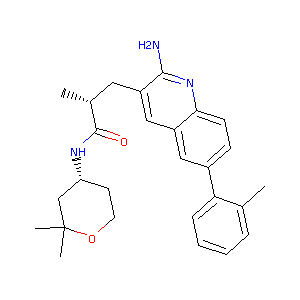

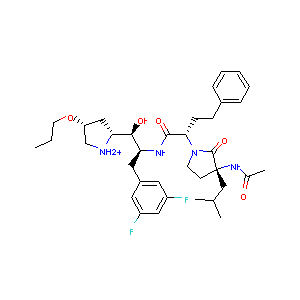

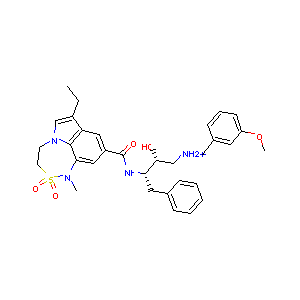

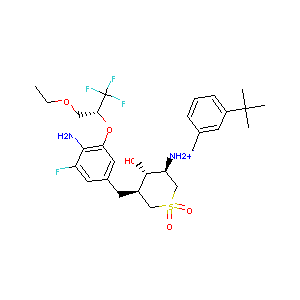

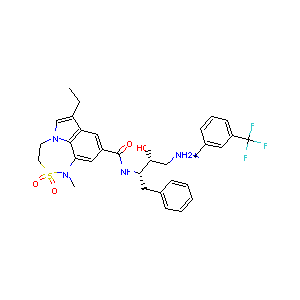

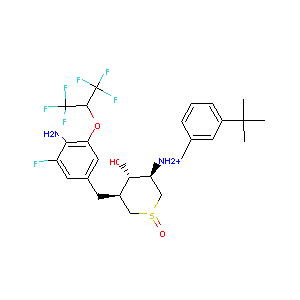

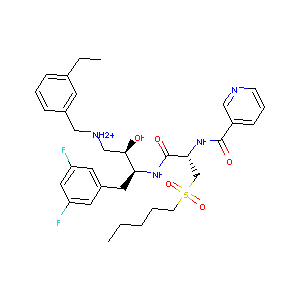

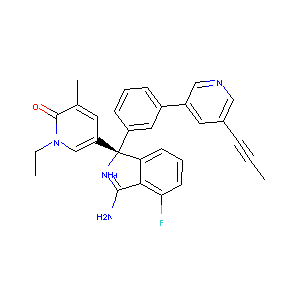

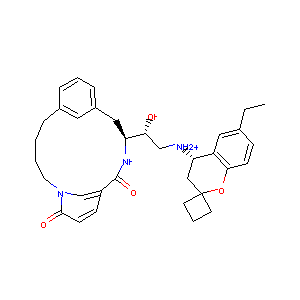

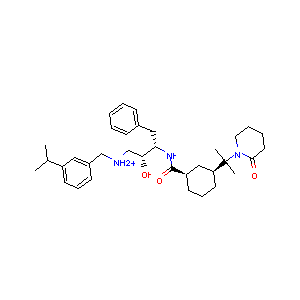

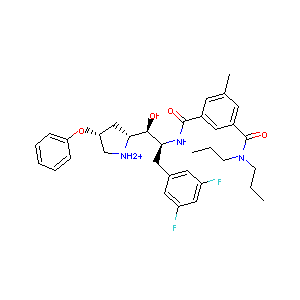

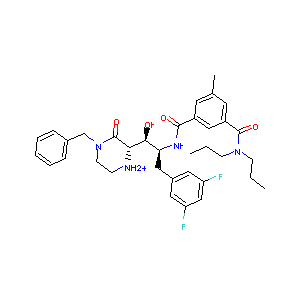

In [23]:
num_to_display = 12
molecules = []
for _, data in islice(dataset.iterrows(), num_to_display):
    molecules.append(Chem.MolFromSmiles(data["mol"]))
display_images(mols_to_pngs(molecules, basename="dataset"))

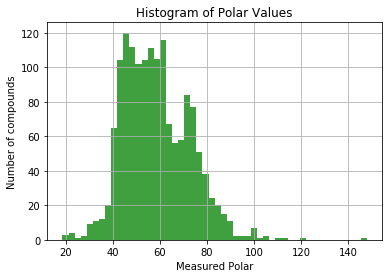

In [24]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Polars = np.array(dataset["Polar"])
# Remove some dirty data from the dataset
Polars = [Polar for Polar in Polars if Polar != '']
n, bins, patches = plt.hist(Polars, 50, facecolor='green', alpha=0.75)
plt.xlabel('Measured Polar')
plt.ylabel('Number of compounds')
plt.title(r'Histogram of Polar Values')
plt.grid(True)
plt.show()

In [25]:
user_specified_features = ['MW','AlogP','HBA','HBD','RB','HeavyAtomCount','ChiralCenterCount','ChiralCenterCountAllPossible','RingCount','PSA','Estate','MR','Polar','sLi_Key','ssBe_Key','ssssBem_Key','sBH2_Key','ssBH_Key','sssB_Key','ssssBm_Key','sCH3_Key','dCH2_Key','ssCH2_Key','tCH_Key','dsCH_Key','aaCH_Key','sssCH_Key','ddC_Key','tsC_Key','dssC_Key','aasC_Key','aaaC_Key','ssssC_Key','sNH3_Key','sNH2_Key','ssNH2_Key','dNH_Key','ssNH_Key','aaNH_Key','tN_Key','sssNH_Key','dsN_Key','aaN_Key','sssN_Key','ddsN_Key','aasN_Key','ssssN_Key','daaN_Key','sOH_Key','dO_Key','ssO_Key','aaO_Key','aOm_Key','sOm_Key','sF_Key','sSiH3_Key','ssSiH2_Key','sssSiH_Key','ssssSi_Key','sPH2_Key','ssPH_Key','sssP_Key','dsssP_Key','ddsP_Key','sssssP_Key','sSH_Key','dS_Key','ssS_Key','aaS_Key','dssS_Key','ddssS_Key','ssssssS_Key','Sm_Key','sCl_Key','sGeH3_Key','ssGeH2_Key','sssGeH_Key','ssssGe_Key','sAsH2_Key','ssAsH_Key','sssAs_Key','dsssAs_Key','ddsAs_Key','sssssAs_Key','sSeH_Key','dSe_Key','ssSe_Key','aaSe_Key','dssSe_Key','ssssssSe_Key','ddssSe_Key','sBr_Key','sSnH3_Key','ssSnH2_Key','sssSnH_Key','ssssSn_Key','sI_Key','sPbH3_Key','ssPbH2_Key','sssPbH_Key','ssssPb_Key','sLi_Cnt','ssBe_Cnt','ssssBem_Cnt','sBH2_Cnt','ssBH_Cnt','sssB_Cnt','ssssBm_Cnt','sCH3_Cnt','dCH2_Cnt','ssCH2_Cnt','tCH_Cnt','dsCH_Cnt','aaCH_Cnt','sssCH_Cnt','ddC_Cnt','tsC_Cnt','dssC_Cnt','aasC_Cnt','aaaC_Cnt','ssssC_Cnt','sNH3_Cnt','sNH2_Cnt','ssNH2_Cnt','dNH_Cnt','ssNH_Cnt','aaNH_Cnt','tN_Cnt','sssNH_Cnt','dsN_Cnt','aaN_Cnt','sssN_Cnt','ddsN_Cnt','aasN_Cnt','ssssN_Cnt','daaN_Cnt','sOH_Cnt','dO_Cnt','ssO_Cnt','aaO_Cnt','aOm_Cnt','sOm_Cnt','sF_Cnt','sSiH3_Cnt','ssSiH2_Cnt','sssSiH_Cnt','ssssSi_Cnt','sPH2_Cnt','ssPH_Cnt','sssP_Cnt','dsssP_Cnt','ddsP_Cnt','sssssP_Cnt','sSH_Cnt','dS_Cnt','ssS_Cnt','aaS_Cnt','dssS_Cnt','ddssS_Cnt','ssssssS_Cnt','Sm_Cnt','sCl_Cnt','sGeH3_Cnt','ssGeH2_Cnt','sssGeH_Cnt','ssssGe_Cnt','sAsH2_Cnt','ssAsH_Cnt','sssAs_Cnt','dsssAs_Cnt','ddsAs_Cnt','sssssAs_Cnt','sSeH_Cnt','dSe_Cnt','ssSe_Cnt','aaSe_Cnt','dssSe_Cnt','ssssssSe_Cnt','ddssSe_Cnt','sBr_Cnt','sSnH3_Cnt','ssSnH2_Cnt','sssSnH_Cnt','ssssSn_Cnt','sI_Cnt','sPbH3_Cnt','ssPbH2_Cnt','sssPbH_Cnt','ssssPb_Cnt','sLi_Sum','ssBe_Sum','ssssBem_Sum','sBH2_Sum','ssBH_Sum','sssB_Sum','ssssBm_Sum','sCH3_Sum','dCH2_Sum','ssCH2_Sum','tCH_Sum','dsCH_Sum','aaCH_Sum','sssCH_Sum','ddC_Sum','tsC_Sum','dssC_Sum','aasC_Sum','aaaC_Sum','ssssC_Sum','sNH3_Sum','sNH2_Sum','ssNH2_Sum','dNH_Sum','ssNH_Sum','aaNH_Sum','tN_Sum','sssNH_Sum','dsN_Sum','aaN_Sum','sssN_Sum','ddsN_Sum','aasN_Sum','ssssN_Sum','daaN_Sum','sOH_Sum','dO_Sum','ssO_Sum','aaO_Sum','aOm_Sum','sOm_Sum','sF_Sum','sSiH3_Sum','ssSiH2_Sum','sssSiH_Sum','ssssSi_Sum','sPH2_Sum','ssPH_Sum','sssP_Sum','dsssP_Sum','ddsP_Sum','sssssP_Sum','sSH_Sum','dS_Sum','ssS_Sum','aaS_Sum','dssS_Sum','ddssS_Sum','ssssssS_Sum','Sm_Sum','sCl_Sum','sGeH3_Sum','ssGeH2_Sum','sssGeH_Sum','ssssGe_Sum','sAsH2_Sum','ssAsH_Sum','sssAs_Sum','dsssAs_Sum','ddsAs_Sum','sssssAs_Sum','sSeH_Sum','dSe_Sum','ssSe_Sum','aaSe_Sum','dssSe_Sum','ssssssSe_Sum','ddssSe_Sum','sBr_Sum','sSnH3_Sum','ssSnH2_Sum','sssSnH_Sum','ssssSn_Sum','sI_Sum','sPbH3_Sum','ssPbH2_Sum','sssPbH_Sum','ssssPb_Sum','sLi_Avg','ssBe_Avg','ssssBem_Avg','sBH2_Avg','ssBH_Avg','sssB_Avg','ssssBm_Avg','sCH3_Avg','dCH2_Avg','ssCH2_Avg','tCH_Avg','dsCH_Avg','aaCH_Avg','sssCH_Avg','ddC_Avg','tsC_Avg','dssC_Avg','aasC_Avg','aaaC_Avg','ssssC_Avg','sNH3_Avg','sNH2_Avg','ssNH2_Avg','dNH_Avg','ssNH_Avg','aaNH_Avg','tN_Avg','sssNH_Avg','dsN_Avg','aaN_Avg','sssN_Avg','ddsN_Avg','aasN_Avg','ssssN_Avg','daaN_Avg','sOH_Avg','dO_Avg','ssO_Avg','aaO_Avg','aOm_Avg','sOm_Avg','sF_Avg','sSiH3_Avg','ssSiH2_Avg','sssSiH_Avg','ssssSi_Avg','sPH2_Avg','ssPH_Avg','sssP_Avg','dsssP_Avg','ddsP_Avg','sssssP_Avg','sSH_Avg','dS_Avg','ssS_Avg','aaS_Avg','dssS_Avg','ddssS_Avg','ssssssS_Avg','Sm_Avg','sCl_Avg','sGeH3_Avg','ssGeH2_Avg','sssGeH_Avg','ssssGe_Avg','sAsH2_Avg','ssAsH_Avg','sssAs_Avg','dsssAs_Avg','ddsAs_Avg','sssssAs_Avg','sSeH_Avg','dSe_Avg','ssSe_Avg','aaSe_Avg','dssSe_Avg','ssssssSe_Avg','ddssSe_Avg','sBr_Avg','sSnH3_Avg','ssSnH2_Avg','sssSnH_Avg','ssssSn_Avg','sI_Avg','sPbH3_Avg','ssPbH2_Avg','sssPbH_Avg','ssssPb_Avg','First Zagreb (ZM1)','First Zagreb index by valence vertex degrees (ZM1V)','Second Zagreb (ZM2)','Second Zagreb index by valence vertex degrees (ZM2V)','Polarity (Pol)','Narumi Simple Topological (NST)','Narumi Harmonic Topological (NHT)','Narumi Geometric Topological (NGT)','Total structure connectivity (TSC)','Wiener (W)','Mean Wiener (MW)','Xu (Xu)','Quadratic (QIndex)','Radial centric (RC)','Mean Square Distance Balaban (MSDB)','Superpendentic (SP)','Harary (Har)','Log of product of row sums (LPRS)','Pogliani (Pog)','Schultz Molecular Topological (SMT)','Schultz Molecular Topological by valence vertex degrees (SMTV)','Mean Distance Degree Deviation (MDDD)','Ramification (Ram)','Gutman Molecular Topological (GMT)','Gutman MTI by valence vertex degrees (GMTV)','Average vertex distance degree (AVDD)','Unipolarity (UP)','Centralization (CENT)','Variation (VAR)','Molecular electrotopological variation (MEV)','Maximal electrotopological positive variation (MEPV)','Maximal electrotopological negative variation (MENV)','Eccentric connectivity (ECCc)','Eccentricity (ECC)','Average eccentricity (AECC)','Eccentric (DECC)','Valence connectivity index chi-0 (vX0)','Valence connectivity index chi-1 (vX1)','Valence connectivity index chi-2 (vX2)','Valence connectivity index chi-3 (vX3)','Valence connectivity index chi-4 (vX4)','Valence connectivity index chi-5 (vX5)','Average valence connectivity index chi-0 (AvX0)','Average valence connectivity index chi-1 (AvX1)','Average valence connectivity index chi-2 (AvX2)','Average valence connectivity index chi-3 (AvX3)','Average valence connectivity index chi-4 (AvX4)','Average valence connectivity index chi-5 (AvX5)','Quasi Wiener (QW)','First Mohar (FM)','Second Mohar (SM)','Spanning tree number (STN)','Kier benzene-likeliness index (KBLI)','Topological charge index of order 1 (TCI1)','Topological charge index of order 2 (TCI2)','Topological charge index of order 3 (TCI3)','Topological charge index of order 4 (TCI4)','Topological charge index of order 5 (TCI5)','Topological charge index of order 6 (TCI6)','Topological charge index of order 7 (TCI7)','Topological charge index of order 8 (TCI8)','Topological charge index of order 9 (TCI9)','Topological charge index of order 10 (TCI10)','Mean topological charge index of order 1 (MTCI1)','Mean topological charge index of order 2 (MTCI2)','Mean topological charge index of order 3 (MTCI3)','Mean topological charge index of order 4 (MTCI4)','Mean topological charge index of order 5 (MTCI5)','Mean topological charge index of order 6 (MTCI6)','Mean topological charge index of order 7 (MTCI7)','Mean topological charge index of order 8 (MTCI8)','Mean topological charge index of order 9 (MTCI9)','Mean topological charge index of order 10 (MTCI10)','Global topological charge (GTC)','Hyper-distance-path index (HDPI)','Reciprocal hyper-distance-path index (RHDPI)','Square reciprocal distance sum (SRDS)','Modified Randic connectivity (MRC)','Balaban centric (BC)','Lopping centric (LC)','Kier Hall electronegativity (KHE)','Sum of topological distances between N..N (STD(N N))','Sum of topological distances between N..O (STD(N O))','Sum of topological distances between N..S (STD(N S))','Sum of topological distances between N..P (STD(N P))','Sum of topological distances between N..F (STD(N F))','Sum of topological distances between N..Cl (STD(N Cl))','Sum of topological distances between N..Br (STD(N Br))','Sum of topological distances between N..I (STD(N I))','Sum of topological distances between O..O (STD(O O))','Sum of topological distances between O..S (STD(O S))','Sum of topological distances between O..P (STD(O P))','Sum of topological distances between O..F (STD(O F))','Sum of topological distances between O..Cl (STD(O Cl))','Sum of topological distances between O..Br (STD(O Br))','Sum of topological distances between O..I (STD(O I))','Sum of topological distances between S..S (STD(S S))','Sum of topological distances between S..P (STD(S P))','Sum of topological distances between S..F (STD(S F))','Sum of topological distances between S..Cl (STD(S Cl))','Sum of topological distances between S..Br (STD(S Br))','Sum of topological distances between S..I (STD(S I))','Sum of topological distances between P..P (STD(P P))','Sum of topological distances between P..F (STD(P F))','Sum of topological distances between P..Cl (STD(P Cl))','Sum of topological distances between P..Br (STD(P Br))','Sum of topological distances between P..I (STD(P I))','Sum of topological distances between F..F (STD(F F))','Sum of topological distances between F..Cl (STD(F Cl))','Sum of topological distances between F..Br (STD(F Br))','Sum of topological distances between F..I (STD(F I))','Sum of topological distances between Cl..Cl (STD(Cl Cl))','Sum of topological distances between Cl..Br (STD(Cl Br))','Sum of topological distances between Cl..I (STD(Cl I))','Sum of topological distances between Br..Br (STD(Br Br))','Sum of topological distances between Br..I (STD(Br I))','Sum of topological distances between I..I (STD(I I))','Wiener-type index from Z weighted distance matrix - Barysz matrix (WhetZ)','Wiener-type index from electronegativity weighted distance matrix (Whete)','Wiener-type index from mass weighted distance matrix (Whetm)','Wiener-type index from van der waals weighted distance matrix (Whetv)','Wiener-type index from polarizability weighted distance matrix (Whetp)','Balaban-type index from Z weighted distance matrix - Barysz matrix (JhetZ)','Balaban-type index from electronegativity weighted distance matrix (Jhete)','Balaban-type index from mass weighted distance matrix (Jhetm)','Balaban-type index from van der waals weighted distance matrix (Jhetv)','Balaban-type index from polarizability weighted distance matrix (Jhetp)','Topological diameter (TD)','Topological radius (TR)','Petitjean 2D shape (PJ2DS)','Balaban distance connectivity index (J)','Solvation connectivity index chi-0 (SCIX0)','Solvation connectivity index chi-1 (SCIX1)','Solvation connectivity index chi-2 (SCIX2)','Solvation connectivity index chi-3 (SCIX3)','Solvation connectivity index chi-4 (SCIX4)','Solvation connectivity index chi-5 (SCIX5)','Connectivity index chi-0 (CIX0)','Connectivity chi-1 [Randic connectivity] (CIX1)','Connectivity index chi-2 (CIX2)','Connectivity index chi-3 (CIX3)','Connectivity index chi-4 (CIX4)','Connectivity index chi-5 (CIX5)','Average connectivity index chi-0 (ACIX0)','Average connectivity index chi-1 (ACIX1)','Average connectivity index chi-2 (ACIX2)','Average connectivity index chi-3 (ACIX3)','Average connectivity index chi-4 (ACIX4)','Average connectivity index chi-5 (ACIX5)','reciprocal distance Randic-type index (RDR)','reciprocal distance square Randic-type index (RDSR)','1-path Kier alpha-modified shape index (KAMS1)','2-path Kier alpha-modified shape index (KAMS2)','3-path Kier alpha-modified shape index (KAMS3)','Kier flexibility (KF)','path/walk 2 - Randic shape index (RSIpw2)','path/walk 3 - Randic shape index (RSIpw3)','path/walk 4 - Randic shape index (RSIpw4)','path/walk 5 - Randic shape index (RSIpw5)','E-state topological parameter (ETP)','Ring Count 3 (RNGCNT3)','Ring Count 4 (RNGCNT4)','Ring Count 5 (RNGCNT5)','Ring Count 6 (RNGCNT6)','Ring Count 7 (RNGCNT7)','Ring Count 8 (RNGCNT8)','Ring Count 9 (RNGCNT9)','Ring Count 10 (RNGCNT10)','Ring Count 11 (RNGCNT11)','Ring Count 12 (RNGCNT12)','Ring Count 13 (RNGCNT13)','Ring Count 14 (RNGCNT14)','Ring Count 15 (RNGCNT15)','Ring Count 16 (RNGCNT16)','Ring Count 17 (RNGCNT17)','Ring Count 18 (RNGCNT18)','Ring Count 19 (RNGCNT19)','Ring Count 20 (RNGCNT20)','Atom Count (ATMCNT)','Bond Count (BNDCNT)','Atoms in Ring System (ATMRNGCNT)','Bonds in Ring System (BNDRNGCNT)','Cyclomatic number (CYCLONUM)','Number of ring systems (NRS)','Normalized number of ring systems (NNRS)','Ring Fusion degree (RFD)','Ring perimeter (RNGPERM)','Ring bridge count (RNGBDGE)','Molecule cyclized degree (MCD)','Ring Fusion density (RFDELTA)','Ring complexity index (RCI)','Van der Waals surface area (VSA)','MR1 (MR1)','MR2 (MR2)','MR3 (MR3)','MR4 (MR4)','MR5 (MR5)','MR6 (MR6)','MR7 (MR7)','MR8 (MR8)','ALOGP1 (ALOGP1)','ALOGP2 (ALOGP2)','ALOGP3 (ALOGP3)','ALOGP4 (ALOGP4)','ALOGP5 (ALOGP5)','ALOGP6 (ALOGP6)','ALOGP7 (ALOGP7)','ALOGP8 (ALOGP8)','ALOGP9 (ALOGP9)','ALOGP10 (ALOGP10)','PEOE1 (PEOE1)','PEOE2 (PEOE2)','PEOE3 (PEOE3)','PEOE4 (PEOE4)','PEOE5 (PEOE5)','PEOE6 (PEOE6)','PEOE7 (PEOE7)','PEOE8 (PEOE8)','PEOE9 (PEOE9)','PEOE10 (PEOE10)','PEOE11 (PEOE11)','PEOE12 (PEOE12)','PEOE13 (PEOE13)','PEOE14 (PEOE14)']

In [26]:
import deepchem as dc
import tempfile, shutil

featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
      tasks=["Class"], smiles_field="mol", id_field="mol",
      featurizer=featurizer)
dataset = loader.featurize(dataset_file)
crystal_dataset = loader.featurize(crystal_dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.278 s
TIMING: featurizing shard 0 took 0.288 s
TIMING: dataset construction took 0.746 s
Loading dataset from disk.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from crystal_desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.270 s
TIMING: featurizing shard 0 took 0.271 s
TIMING: dataset construction took 0.373 s
Loading dataset from disk.


In [27]:
splitter = dc.splits.SpecifiedSplitter(dataset_file, "Model")
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset


TIMING: dataset construction took 0.074 s
Loading dataset from disk.
TIMING: dataset construction took 0.057 s
Loading dataset from disk.
TIMING: dataset construction took 0.193 s
Loading dataset from disk.


['S(=O)(=O)(N(C)c1cc(cc(c1)C(=O)NC(C(O)CC(OC)C(=O)NC(C(C)C)C(=O)NCc1ccccc1)COc1cc(F)cc(F)c1)C(=O)NC(C)c1ccccc1)C'
 'O=C(NCCC(C)(C)C)C(Cc1cc2cc(ccc2nc1N)-c1ccccc1C)C'
 'Fc1cc(cc(F)c1)CC(NC(=O)C(N1CCC(NC(=O)C)(C(CC)C)C1=O)CCc1ccccc1)C(O)C1[NH2+]CC(O)C1'
 ... 'Brc1cc(ccc1)C1CC1C=1N=C(N)N(C)C(=O)C=1'
 'O=C1N(C)C(=NC(=C1)C1CC1c1cc(ccc1)-c1ccccc1)N'
 'Clc1cc2nc(n(c2cc1)CCCC(=O)NCC1CC1)N']


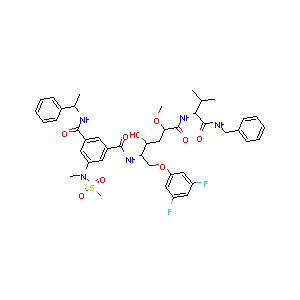

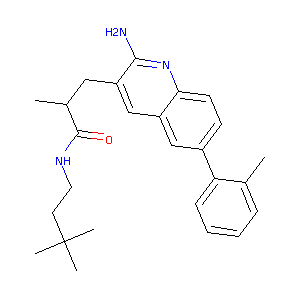

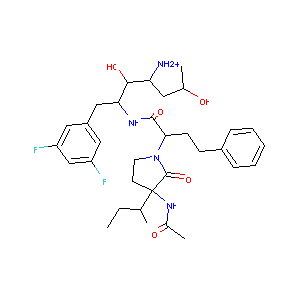

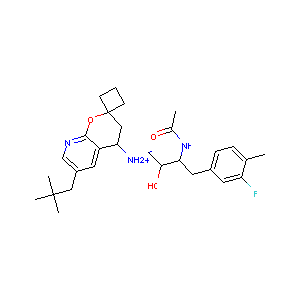

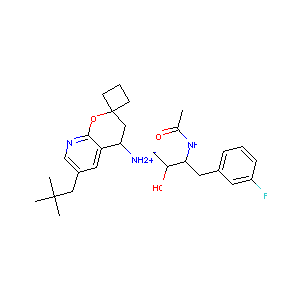

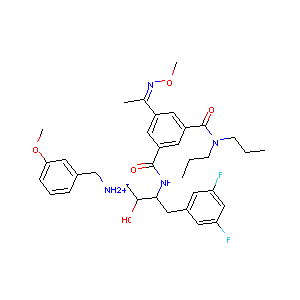

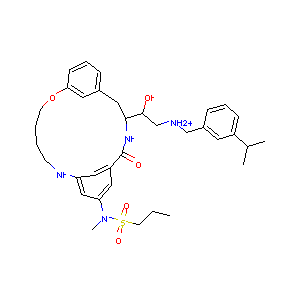

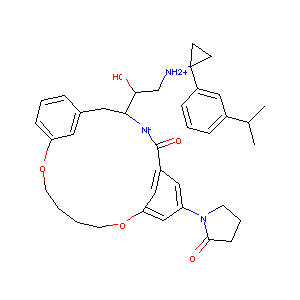

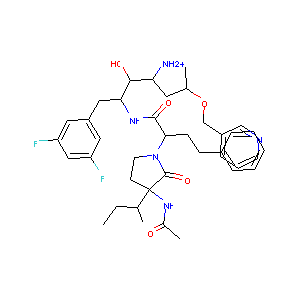

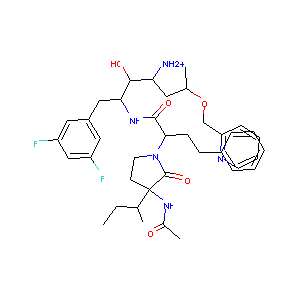

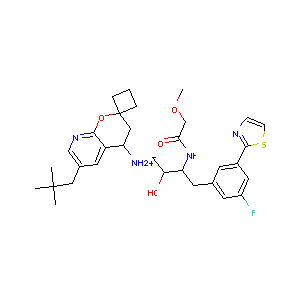

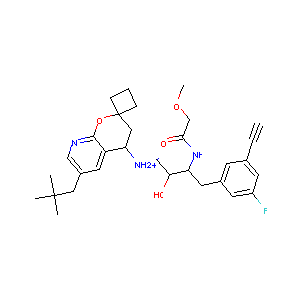

In [28]:
print(valid_dataset.ids)
valid_mols = [Chem.MolFromSmiles(compound)
              for compound in islice(valid_dataset.ids, num_to_display)]
display_images(mols_to_pngs(valid_mols, basename="valid_set"))

In [29]:
print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))
print("Number of compounds in test set")
print(len(test_dataset))
print("Number of compounds in crystal set")
print(len(crystal_dataset))

Number of compounds in train set
204
Number of compounds in validation set
1273
Number of compounds in test set
45
Number of compounds in crystal set
25


In [30]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset, test_dataset, crystal_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset, test_dataset, crystal_dataset = datasets

/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/trans/transformers.py:145: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.047 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/trans/transformers.py:145: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.211 s
Loading dataset from disk.
TIMING: dataset construction took 0.139 s
Loading dataset from disk.
TIMING: dataset construction took 0.016 s
Loading dataset from disk.
TIMING: dataset construction took 0.013 s
Loading dataset from disk.
TIMING: dataset construction took 0.012 s
Loading dataset from disk.
TIMING: dataset construction took 0.010 s
Loading dataset from disk.


In [31]:
from sklearn.ensemble import RandomForestClassifier

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/8
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [0.7604336864225709]
Model 1/8, Metric roc_auc_score, Validation set 0: 0.760434
	best_validation_score so far: 0.760434
Fitting model 2/8
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [0.7353433193739913]
Model 2/8, Metric roc_auc_score, Validation set 1: 0.735343
	best_validation_score so far: 0.760434
Fitting model 3/8
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [0.7427712645353952]
Model 3/8, Metric roc_auc_score, Validation set 2: 0.742771
	best_validation_score so far: 0.760434
Fitting model 4/8
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [0.7452742683913911]
Model 4/8, Metric roc_auc_score, Validation set 3: 0.745274
	best_validation_score so far: 0.760434
Fitting model 5/8
hyperparameters: {'n_estimators': 100, 'max_features': 'auto'}
computed_metrics: [0.7704387892072333]
Model 

In [32]:
import numpy.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=1)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=1)),
               "nb_epoch": [40] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultiTaskClassifier(
    1, n_features, layer_sizes=[1000], dropouts=.25,
    batch_size=50, **model_params)
  return model

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)


Fitting model 1/1
hyperparameters: {'learning_rate': 1.0354624779573903e-05, 'weight_decay_penalty': 2.476627222972838e-06, 'nb_epoch': 40}
computed_metrics: [0.7384269849329599]
Model 1/1, Metric roc_auc_score, Validation set 0: 0.738427
	best_validation_score so far: 0.738427
computed_metrics: [0.8673587081891581]
Best hyperparameters: (1.0354624779573903e-05, 2.476627222972838e-06, 40)
train_score: 0.867359
validation_score: 0.738427


In [33]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set AUC %f" % (rf_train_score["roc_auc_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set AUC %f" % (rf_valid_score["roc_auc_score"]))

rf_test_csv_out = "rf_test_regressor.csv"
rf_test_stats_out = "rf_test_stats_regressor.txt"
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_score = rf_test_evaluator.compute_model_performance(
    [metric], rf_test_csv_out, rf_test_stats_out)
print("RF Test set AUC %f" % (rf_test_score["roc_auc_score"]))

rf_crystal_csv_out = "rf_crystal_regressor.csv"
rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
print("RF Crystal set R^2 %f" % (rf_crystal_score["roc_auc_score"]))

computed_metrics: [0.9998077662437524]
RF Train set AUC 0.999808
computed_metrics: [0.7754510811367898]
RF Valid set AUC 0.775451
computed_metrics: [0.5227272727272727]
RF Test set AUC 0.522727
computed_metrics: [nan]
RF Crystal set R^2 nan


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/metrics/__init__.py:297: UserWarning: Error calculating metric roc_auc_score: Only one class present in y_true. ROC AUC score is not defined in that case.
  warnings.warn("Error calculating metric %s: %s" % (self.name, e))


In [34]:
dnn_train_csv_out = "dnn_train_classifier.csv"
dnn_train_stats_out = "dnn_train_classifier_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set AUC %f" % (dnn_train_score["roc_auc_score"]))

dnn_valid_csv_out = "dnn_valid_classifier.csv"
dnn_valid_stats_out = "dnn_valid_classifier_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set AUC %f" % (dnn_valid_score["roc_auc_score"]))

dnn_test_csv_out = "dnn_test_classifier.csv"
dnn_test_stats_out = "dnn_test_classifier_stats.txt"
dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
dnn_test_score = dnn_test_evaluator.compute_model_performance(
    [metric], dnn_test_csv_out, dnn_test_stats_out)
print("DNN Test set AUC %f" % (dnn_test_score["roc_auc_score"]))

dnn_crystal_csv_out = "dnn_crystal_classifier.csv"
dnn_crystal_stats_out = "dnn_crystal_stats_classifier.txt"
dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
print("DNN Crystal set AUC %f" % (dnn_crystal_score["roc_auc_score"]))


computed_metrics: [0.8673587081891581]
DNN Train set AUC 0.867359
computed_metrics: [0.7384269849329599]
DNN Valid set AUC 0.738427
computed_metrics: [0.15909090909090906]
DNN Test set AUC 0.159091
computed_metrics: [nan]
DNN Crystal set AUC nan


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/metrics/__init__.py:297: UserWarning: Error calculating metric roc_auc_score: Only one class present in y_true. ROC AUC score is not defined in that case.
  warnings.warn("Error calculating metric %s: %s" % (self.name, e))


In [35]:
#Make directories to store the raw and featurized datasets.
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
    tasks=["Polar"], smiles_field="mol", id_field="CID",
    featurizer=featurizer)
dataset = loader.featurize(dataset_file)
crystal_dataset = loader.featurize(crystal_dataset_file)


Loading raw samples now.
shard_size: 8192
About to start loading CSV from desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.296 s
TIMING: featurizing shard 0 took 0.306 s
TIMING: dataset construction took 0.758 s
Loading dataset from disk.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from crystal_desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.266 s
TIMING: featurizing shard 0 took 0.266 s
TIMING: dataset construction took 0.368 s
Loading dataset from disk.


In [36]:
splitter = dc.splits.SpecifiedSplitter(dataset_file, "Model")
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset

TIMING: dataset construction took 0.078 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
TIMING: dataset construction took 0.196 s
Loading dataset from disk.


In [37]:
print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))
print("Number of compounds in test set")
print(len(test_dataset))
print("Number of compounds in crystal set")
print(len(crystal_dataset))

Number of compounds in train set
204
Number of compounds in validation set
1273
Number of compounds in test set
45
Number of compounds in crystal set
25


In [38]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset, test_dataset, crystal_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset, test_dataset, crystal_dataset = datasets

/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/trans/transformers.py:145: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.043 s
Loading dataset from disk.
TIMING: dataset construction took 0.030 s
Loading dataset from disk.


/home/xiepeng/anaconda2/envs/py3/lib/python3.6/site-packages/deepchem/trans/transformers.py:145: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.217 s
Loading dataset from disk.
TIMING: dataset construction took 0.142 s
Loading dataset from disk.
TIMING: dataset construction took 0.015 s
Loading dataset from disk.
TIMING: dataset construction took 0.013 s
Loading dataset from disk.
TIMING: dataset construction took 0.012 s
Loading dataset from disk.
TIMING: dataset construction took 0.010 s
Loading dataset from disk.


In [39]:
from sklearn.ensemble import RandomForestRegressor

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestRegressor(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.r2_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/8
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [0.9458361476853078]
Model 1/8, Metric r2_score, Validation set 0: 0.945836
	best_validation_score so far: 0.945836
Fitting model 2/8
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [0.8853241343137309]
Model 2/8, Metric r2_score, Validation set 1: 0.885324
	best_validation_score so far: 0.945836
Fitting model 3/8
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [0.8426293793596211]
Model 3/8, Metric r2_score, Validation set 2: 0.842629
	best_validation_score so far: 0.945836
Fitting model 4/8
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [0.9440477683836512]
Model 4/8, Metric r2_score, Validation set 3: 0.944048
	best_validation_score so far: 0.945836
Fitting model 5/8
hyperparameters: {'n_estimators': 100, 'max_features': 'auto'}
computed_metrics: [0.953225939130029]
Model 5/8, Metric r2_score,

In [40]:
import numpy.random

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [20] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultiTaskRegressor(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=50, **model_params)
  return model

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/4
hyperparameters: {'learning_rate': 7.504772965620739e-05, 'weight_decay_penalty': 1.4787361964019783e-05, 'nb_epoch': 20}
computed_metrics: [0.15425514280354657]
Model 1/4, Metric r2_score, Validation set 0: 0.154255
	best_validation_score so far: 0.154255
Fitting model 2/4
hyperparameters: {'learning_rate': 7.504772965620739e-05, 'weight_decay_penalty': 4.804907043896945e-06, 'nb_epoch': 20}
computed_metrics: [0.12776365638150866]
Model 2/4, Metric r2_score, Validation set 1: 0.127764
	best_validation_score so far: 0.154255
Fitting model 3/4
hyperparameters: {'learning_rate': 0.00014714944510885617, 'weight_decay_penalty': 1.4787361964019783e-05, 'nb_epoch': 20}
computed_metrics: [0.40231257342567284]
Model 3/4, Metric r2_score, Validation set 2: 0.402313
	best_validation_score so far: 0.402313
Fitting model 4/4
hyperparameters: {'learning_rate': 0.00014714944510885617, 'weight_decay_penalty': 4.804907043896945e-06, 'nb_epoch': 20}
computed_metrics: [0.38075136074053

In [41]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set R^2 %f" % (rf_train_score["r2_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set R^2 %f" % (rf_valid_score["r2_score"]))

rf_test_csv_out = "rf_test_regressor.csv"
rf_test_stats_out = "rf_test_stats_regressor.txt"
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_score = rf_test_evaluator.compute_model_performance(
    [metric], rf_test_csv_out, rf_test_stats_out)
print("RF Test set R^2 %f" % (rf_test_score["r2_score"]))

rf_crystal_csv_out = "rf_crystal_regressor.csv"
rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
print("RF Crystal set R^2 %f" % (rf_crystal_score["r2_score"]))

computed_metrics: [0.9954402873994902]
RF Train set R^2 0.995440
computed_metrics: [0.953225939130029]
RF Valid set R^2 0.953226
computed_metrics: [0.9229257344868821]
RF Test set R^2 0.922926
computed_metrics: [0.9662939510336611]
RF Crystal set R^2 0.966294


In [42]:
dnn_train_csv_out = "dnn_train_regressor.csv"
dnn_train_stats_out = "dnn_train_regressor_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set R^2 %f" % (dnn_train_score["r2_score"]))

dnn_valid_csv_out = "dnn_valid_regressor.csv"
dnn_valid_stats_out = "dnn_valid_regressor_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set R^2 %f" % (dnn_valid_score["r2_score"]))

dnn_test_csv_out = "dnn_test_regressor.csv"
dnn_test_stats_out = "dnn_test_regressor_stats.txt"
dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
dnn_test_score = dnn_test_evaluator.compute_model_performance(
    [metric], dnn_test_csv_out, dnn_test_stats_out)
print("DNN Test set R^2 %f" % (dnn_test_score["r2_score"]))

dnn_crystal_csv_out = "dnn_crystal_regressor.csv"
dnn_crystal_stats_out = "dnn_crystal_stats_regressor.txt"
dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
print("DNN Crystal set R^2 %f" % (dnn_crystal_score["r2_score"]))

computed_metrics: [0.3887103726696326]
DNN Train set R^2 0.388710
computed_metrics: [0.40231257342567284]
DNN Valid set R^2 0.402313
computed_metrics: [0.3021594544205759]
DNN Test set R^2 0.302159
computed_metrics: [0.3143477557548524]
DNN Crystal set R^2 0.314348


In [43]:
#import pandas as pd
#polars = pd.read_csv("polardata.csv")

In [44]:
#polars.info()

In [45]:
#polars.head()

In [46]:
#polars.describe()

In [47]:
#import numpy as np
#np.any(polars.isnull()==True)

In [48]:
#polars

In [49]:
#polarse = polars.drop(['Compound'],axis=1)

In [50]:
#polarse

In [51]:
#polarse.corr()

In [52]:
import pandas as pd
polarss1 = pd.read_csv("dnn_crystal_regressor.csv")
polarsss1 = pd.read_csv("crystal_desc_canvas_aug30.csv",usecols=[17])
number = pd.read_csv("dnn_crystal_regressor.csv",usecols=[0])

In [53]:
del polarss1['Compound']
polarss1.columns = ['Polar2']
result1 = pd.concat([number,polarsss1, polarss1], axis=1)

result1
result1.to_csv('resultend.csv')

In [54]:
#number.head()

In [55]:
#polarsss1.info()

In [56]:
#polarss1.head()

In [57]:
#polarsss1.head()

In [58]:
result = pd.concat([polarsss1, polarss1], axis=1)

In [59]:
#del polarss['label']

In [60]:
#polarss1

In [61]:
#polarss.columns

In [62]:
#polarss1.columns

In [63]:
#polarss1

In [64]:
#del polarsss['label']

In [65]:
#polarsss1

In [66]:
#result1

In [67]:
import subprocess


In [68]:
retcode = subprocess.call("csvtotable resultend.csv result.html",shell=True)


In [69]:
print (retcode)

0


In [70]:
#retcode1 = subprocess.call("cp /home/xiepeng/fullalldata_predictdemo/resultend.html /home/xiepeng/webdata/result.html",shell=True)

In [71]:
#print (retcode1)

In [72]:
#subprocess.call("zip result.zip result.html",shell=True)

In [73]:
#subprocess.call("cp /home/xiepeng/websatrt/normal.html /home/xiepeng/webdata/index.html",shell=True)

In [74]:
from subprocess import Popen,PIPE

In [75]:
#my information
#p1 = Popen('git add --all',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
#p1.wait()
#p2 = Popen('git commit -m \"first inttial\"',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
#p2.wait()
#p3 = Popen('git push sae master:1',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
#p3.wait()

In [76]:
#reload the page http://1.dataofpredict.applinzi.com/

In [77]:
#first step deletel page
p4 = Popen('rm index.html',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p4.wait()
p5 = Popen('git add --all',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p5.wait()
p6 = Popen('git commit -m \"rm\"',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p6.wait()
p7 = Popen('git push sae master:1',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p7.wait()

0

In [78]:
#404

In [79]:
#please reload page predict has completed
subprocess.call("cp result.html /home/xiepeng/webdata/index.html",shell=True)
p8 = Popen('git add --all',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p8.wait()
p9 = Popen('git commit -m \"up\"',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p9.wait()
p10 = Popen('git push sae master:1',shell=True,stdout=PIPE,cwd='/home/xiepeng/webdata')
p10.wait()

0

In [176]:
#subprocess.call("rm /home/xiepeng/webdata/result.html",shell=True)

0

0

0

In [ ]:
#please reload page predict has completed

In [133]:
#retcode2 = subprocess.call("zip result.zip /home/xiepeng/webdata/result.html",shell=True)

In [134]:
#print (retcode2)

0


In [128]:
#subprocess.call("git add *",shell=True)

0

In [129]:
#subprocess.call("git commit -m \"upload\"",shell=True)

0

In [130]:
#subprocess.call("git push ase master:1",shell=True)

128

In [546]:
#result1.corr()

,Polar,Polar2
Polar,1.000000,0.846961
Polar2,0.846961,1.000000


In [547]:
#import pandas as pd

In [124]:
#plt.style.use('ggplot')#

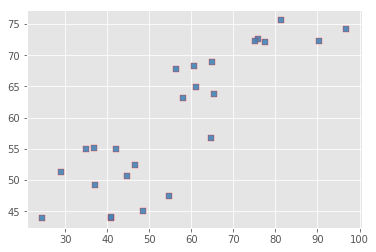

In [125]:
#plt.scatter(result.Polar, result.Polar2,c = 'steelblue', marker = 's', alpha = 0.9,linewidths = 0.3, edgecolors = 'red')

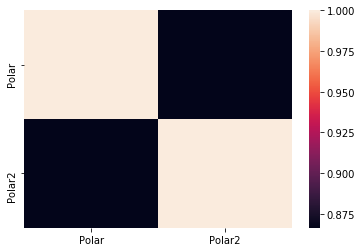

In [279]:
import seaborn as sns
%matplotlib inline

corr = result.corr()
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values)
plt.show()

In [548]:
#corr_data = pd.read_csv("corr_analysis.csv")

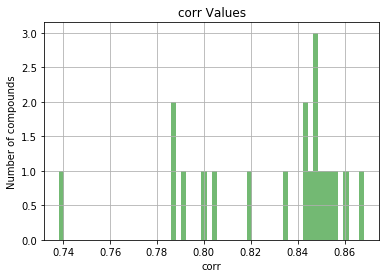

In [552]:
#%matplotlib inline
#import matplotlib
#import numpy as np
#import matplotlib.pyplot as plt

#corrdata = np.array(corr_data["corr"])
# Remove some dirty data from the dataset
#Polars = [Polar for Polar in Polars if Polar != '']
#n, bins, patches = plt.hist(corrdata, 60, facecolor='green', alpha=0.55)
#plt.xlabel('corr')
#plt.ylabel('Number of compounds')
#plt.title('corr Values')
#plt.grid(True)
#plt.show()

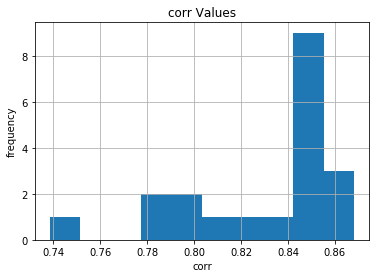

In [555]:
#corr_data["corr"].hist()
#plt.xlabel('corr')
#plt.ylabel('frequency')
#plt.title('corr Values')
#plt.grid(True)
#plt.show()

Fitting model 1/4
hyperparameters: {'learning_rate': 2.4241910948882608e-05, 'weight_decay_penalty': 1.1276248818547927e-05, 'nb_epoch': 20}
computed_metrics: [-7.840462498026859]
Model 1/4, Metric r2_score, Validation set 0: -7.840462
	best_validation_score so far: -7.840462
Fitting model 2/4
hyperparameters: {'learning_rate': 2.4241910948882608e-05, 'weight_decay_penalty': 1.8722686526050603e-05, 'nb_epoch': 20}
computed_metrics: [-7.5147055276165045]
Model 2/4, Metric r2_score, Validation set 1: -7.514706
	best_validation_score so far: -7.514706
Fitting model 3/4
hyperparameters: {'learning_rate': 0.00044889983833406276, 'weight_decay_penalty': 1.1276248818547927e-05, 'nb_epoch': 20}
computed_metrics: [0.630439690395415]
Model 3/4, Metric r2_score, Validation set 2: 0.630440
	best_validation_score so far: 0.630440
Fitting model 4/4
hyperparameters: {'learning_rate': 0.00044889983833406276, 'weight_decay_penalty': 1.8722686526050603e-05, 'nb_epoch': 20}
computed_metrics: [0.639892741

computed_metrics: [-10.94709748494833]
Model 3/4, Metric r2_score, Validation set 2: -10.947097
	best_validation_score so far: 0.658926
Fitting model 4/4
hyperparameters: {'learning_rate': 1.8029070100757105e-05, 'weight_decay_penalty': 6.924781210289044e-05, 'nb_epoch': 20}
computed_metrics: [-10.939553063792209]
Model 4/4, Metric r2_score, Validation set 3: -10.939553
	best_validation_score so far: 0.658926
computed_metrics: [0.7374928154401474]
Best hyperparameters: (0.0009002386241860523, 6.924781210289044e-05, 20)
train_score: 0.737493
validation_score: 0.658926
computed_metrics: [0.7374928154401474]
DNN Train set R^2 0.737493
computed_metrics: [0.6589262969769694]
DNN Valid set R^2 0.658926
computed_metrics: [0.5894437585616995]
DNN Test set R^2 0.589444
computed_metrics: [0.6128212592301485]
DNN Crystal set R^2 0.612821
Fitting model 1/4
hyperparameters: {'learning_rate': 2.753907930080249e-05, 'weight_decay_penalty': 6.046456204348407e-06, 'nb_epoch': 20}
computed_metrics: [-7.

computed_metrics: [0.4769151494006727]
DNN Valid set R^2 0.476915
computed_metrics: [0.37982579383949255]
DNN Test set R^2 0.379826
computed_metrics: [0.3613322067506901]
DNN Crystal set R^2 0.361332
Fitting model 1/4
hyperparameters: {'learning_rate': 0.00021458884480002262, 'weight_decay_penalty': 1.412451082972283e-06, 'nb_epoch': 20}
computed_metrics: [0.4829887477188115]
Model 1/4, Metric r2_score, Validation set 0: 0.482989
	best_validation_score so far: 0.482989
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00021458884480002262, 'weight_decay_penalty': 1.9926595421562775e-05, 'nb_epoch': 20}
computed_metrics: [0.47748569521152384]
Model 2/4, Metric r2_score, Validation set 1: 0.477486
	best_validation_score so far: 0.482989
Fitting model 3/4
hyperparameters: {'learning_rate': 1.910964758282499e-05, 'weight_decay_penalty': 1.412451082972283e-06, 'nb_epoch': 20}
computed_metrics: [-9.607569663790194]
Model 3/4, Metric r2_score, Validation set 2: -9.607570
	best_validation

computed_metrics: [0.1656022538353017]
Model 2/4, Metric r2_score, Validation set 1: 0.165602
	best_validation_score so far: 0.234603
Fitting model 3/4
hyperparameters: {'learning_rate': 4.1375727302608787e-05, 'weight_decay_penalty': 1.0952470390645234e-05, 'nb_epoch': 20}
computed_metrics: [-3.865040886234829]
Model 3/4, Metric r2_score, Validation set 2: -3.865041
	best_validation_score so far: 0.234603
Fitting model 4/4
hyperparameters: {'learning_rate': 4.1375727302608787e-05, 'weight_decay_penalty': 1.5493508873368657e-05, 'nb_epoch': 20}
computed_metrics: [-3.102040385493333]
Model 4/4, Metric r2_score, Validation set 3: -3.102040
	best_validation_score so far: 0.234603
computed_metrics: [0.2619989474123209]
Best hyperparameters: (8.010625338714782e-05, 1.0952470390645234e-05, 20)
train_score: 0.261999
validation_score: 0.234603
computed_metrics: [0.2619989474123209]
DNN Train set R^2 0.261999
computed_metrics: [0.23460326784783503]
DNN Valid set R^2 0.234603
computed_metrics: [

computed_metrics: [0.6338892471392575]
Model 4/4, Metric r2_score, Validation set 3: 0.633889
	best_validation_score so far: 0.633889
computed_metrics: [0.6495187252999358]
Best hyperparameters: (0.0004365581117063236, 9.44202433985881e-06, 20)
train_score: 0.649519
validation_score: 0.633889
computed_metrics: [0.6495187252999358]
DNN Train set R^2 0.649519
computed_metrics: [0.6338892471392575]
DNN Valid set R^2 0.633889
computed_metrics: [0.5026542479800951]
DNN Test set R^2 0.502654
computed_metrics: [0.4952774450576346]
DNN Crystal set R^2 0.495277
Fitting model 1/4
hyperparameters: {'learning_rate': 0.00010408046540938239, 'weight_decay_penalty': 1.4948928540370291e-05, 'nb_epoch': 20}
computed_metrics: [0.30492351155616915]
Model 1/4, Metric r2_score, Validation set 0: 0.304924
	best_validation_score so far: 0.304924
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00010408046540938239, 'weight_decay_penalty': 2.833023855304144e-05, 'nb_epoch': 20}
computed_metrics: [0.3113

computed_metrics: [-9.108720117324609]
Model 1/4, Metric r2_score, Validation set 0: -9.108720
	best_validation_score so far: -9.108720
Fitting model 2/4
hyperparameters: {'learning_rate': 2.13959147163102e-05, 'weight_decay_penalty': 2.3735698589035607e-05, 'nb_epoch': 20}
computed_metrics: [-9.965067687858372]
Model 2/4, Metric r2_score, Validation set 1: -9.965068
	best_validation_score so far: -9.108720
Fitting model 3/4
hyperparameters: {'learning_rate': 0.0005371261854026992, 'weight_decay_penalty': 2.3691270884000175e-05, 'nb_epoch': 20}
computed_metrics: [0.6411903981444301]
Model 3/4, Metric r2_score, Validation set 2: 0.641190
	best_validation_score so far: 0.641190
Fitting model 4/4
hyperparameters: {'learning_rate': 0.0005371261854026992, 'weight_decay_penalty': 2.3735698589035607e-05, 'nb_epoch': 20}
computed_metrics: [0.6488496920336895]
Model 4/4, Metric r2_score, Validation set 3: 0.648850
	best_validation_score so far: 0.648850
computed_metrics: [0.6820131158676879]
Be

computed_metrics: [0.3923039128834269]
Model 4/4, Metric r2_score, Validation set 3: 0.392304
	best_validation_score so far: 0.404939
computed_metrics: [0.39531175172874156]
Best hyperparameters: (0.00015498397167337344, 1.371598443204394e-06, 20)
train_score: 0.395312
validation_score: 0.404939
computed_metrics: [0.39531175172874156]
DNN Train set R^2 0.395312
computed_metrics: [0.4049391937695873]
DNN Valid set R^2 0.404939
computed_metrics: [0.31068836216353135]
DNN Test set R^2 0.310688
computed_metrics: [0.3266840349928286]
DNN Crystal set R^2 0.326684
Fitting model 1/4
hyperparameters: {'learning_rate': 2.6120639819130122e-05, 'weight_decay_penalty': 4.742250924343192e-05, 'nb_epoch': 20}
computed_metrics: [-7.1022165626397875]
Model 1/4, Metric r2_score, Validation set 0: -7.102217
	best_validation_score so far: -7.102217
Fitting model 2/4
hyperparameters: {'learning_rate': 2.6120639819130122e-05, 'weight_decay_penalty': 3.0397540684631957e-06, 'nb_epoch': 20}
computed_metrics: 

computed_metrics: [0.42485313502624444]
Model 1/4, Metric r2_score, Validation set 0: 0.424853
	best_validation_score so far: 0.424853
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00017045832947344108, 'weight_decay_penalty': 8.488217462310065e-05, 'nb_epoch': 20}
computed_metrics: [0.4337256227768086]
Model 2/4, Metric r2_score, Validation set 1: 0.433726
	best_validation_score so far: 0.433726
Fitting model 3/4
hyperparameters: {'learning_rate': 1.928603296143357e-05, 'weight_decay_penalty': 3.0308789086246125e-06, 'nb_epoch': 20}
computed_metrics: [-9.735145221996726]
Model 3/4, Metric r2_score, Validation set 2: -9.735145
	best_validation_score so far: 0.433726
Fitting model 4/4
hyperparameters: {'learning_rate': 1.928603296143357e-05, 'weight_decay_penalty': 8.488217462310065e-05, 'nb_epoch': 20}
computed_metrics: [-10.106831724708172]
Model 4/4, Metric r2_score, Validation set 3: -10.106832
	best_validation_score so far: 0.433726
computed_metrics: [0.4201264489341684]
B

computed_metrics: [-13.198419263688436]
Model 3/4, Metric r2_score, Validation set 2: -13.198419
	best_validation_score so far: 0.565164
Fitting model 4/4
hyperparameters: {'learning_rate': 1.2283271653328054e-05, 'weight_decay_penalty': 2.6554217074059876e-05, 'nb_epoch': 20}
computed_metrics: [-13.174125374496924]
Model 4/4, Metric r2_score, Validation set 3: -13.174125
	best_validation_score so far: 0.565164
computed_metrics: [0.5532913198054812]
Best hyperparameters: (0.0003045475849479748, 2.6554217074059876e-05, 20)
train_score: 0.553291
validation_score: 0.565164
computed_metrics: [0.5532913198054812]
DNN Train set R^2 0.553291
computed_metrics: [0.5651637669933038]
DNN Valid set R^2 0.565164
computed_metrics: [0.4203764395017917]
DNN Test set R^2 0.420376
computed_metrics: [0.423033802579344]
DNN Crystal set R^2 0.423034
Fitting model 1/4
hyperparameters: {'learning_rate': 0.0009025812137516081, 'weight_decay_penalty': 7.708932314095528e-05, 'nb_epoch': 20}
computed_metrics: [0

computed_metrics: [0.6210980046072715]
DNN Valid set R^2 0.621098
computed_metrics: [0.48847004172100406]
DNN Test set R^2 0.488470
computed_metrics: [0.4891237081023143]
DNN Crystal set R^2 0.489124
Fitting model 1/4
hyperparameters: {'learning_rate': 9.985917189075569e-05, 'weight_decay_penalty': 7.366232858217335e-05, 'nb_epoch': 20}
computed_metrics: [0.3137102276914172]
Model 1/4, Metric r2_score, Validation set 0: 0.313710
	best_validation_score so far: 0.313710
Fitting model 2/4
hyperparameters: {'learning_rate': 9.985917189075569e-05, 'weight_decay_penalty': 2.074012980393535e-06, 'nb_epoch': 20}
computed_metrics: [0.30588984934541885]
Model 2/4, Metric r2_score, Validation set 1: 0.305890
	best_validation_score so far: 0.313710
Fitting model 3/4
hyperparameters: {'learning_rate': 0.0006685946113097055, 'weight_decay_penalty': 7.366232858217335e-05, 'nb_epoch': 20}
computed_metrics: [0.6568384398845076]
Model 3/4, Metric r2_score, Validation set 2: 0.656838
	best_validation_sco

computed_metrics: [0.6433983352460126]
Model 2/4, Metric r2_score, Validation set 1: 0.643398
	best_validation_score so far: 0.644045
Fitting model 3/4
hyperparameters: {'learning_rate': 0.00017356577280023636, 'weight_decay_penalty': 1.3370679548813658e-06, 'nb_epoch': 20}
computed_metrics: [0.43047467166816344]
Model 3/4, Metric r2_score, Validation set 2: 0.430475
	best_validation_score so far: 0.644045
Fitting model 4/4
hyperparameters: {'learning_rate': 0.00017356577280023636, 'weight_decay_penalty': 1.3775279838592719e-05, 'nb_epoch': 20}
computed_metrics: [0.4258952139226825]
Model 4/4, Metric r2_score, Validation set 3: 0.425895
	best_validation_score so far: 0.644045
computed_metrics: [0.6719241218683014]
Best hyperparameters: (0.0005382636138761143, 1.3370679548813658e-06, 20)
train_score: 0.671924
validation_score: 0.644045
computed_metrics: [0.6719241218683014]
DNN Train set R^2 0.671924
computed_metrics: [0.6440445785011248]
DNN Valid set R^2 0.644045
computed_metrics: [0.

computed_metrics: [0.5278111364653489]
DNN Valid set R^2 0.527811
computed_metrics: [0.3924333804700817]
DNN Test set R^2 0.392433
computed_metrics: [0.3960586444390676]
DNN Crystal set R^2 0.396059
Fitting model 1/4
hyperparameters: {'learning_rate': 0.00023461371203927934, 'weight_decay_penalty': 3.438785920344014e-05, 'nb_epoch': 20}
computed_metrics: [0.5013991731030971]
Model 1/4, Metric r2_score, Validation set 0: 0.501399
	best_validation_score so far: 0.501399
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00023461371203927934, 'weight_decay_penalty': 1.3281165062300986e-06, 'nb_epoch': 20}
computed_metrics: [0.491052872373663]
Model 2/4, Metric r2_score, Validation set 1: 0.491053
	best_validation_score so far: 0.501399
Fitting model 3/4
hyperparameters: {'learning_rate': 0.00013101081725326727, 'weight_decay_penalty': 3.438785920344014e-05, 'nb_epoch': 20}
computed_metrics: [0.38662883376339907]
Model 3/4, Metric r2_score, Validation set 2: 0.386629
	best_validation_s

computed_metrics: [0.24703726023921002]
Model 2/4, Metric r2_score, Validation set 1: 0.247037
	best_validation_score so far: 0.262793
Fitting model 3/4
hyperparameters: {'learning_rate': 2.3905407123565057e-05, 'weight_decay_penalty': 5.844240680142392e-05, 'nb_epoch': 20}
computed_metrics: [-8.982752087749736]
Model 3/4, Metric r2_score, Validation set 2: -8.982752
	best_validation_score so far: 0.262793
Fitting model 4/4
hyperparameters: {'learning_rate': 2.3905407123565057e-05, 'weight_decay_penalty': 2.5475826197911306e-06, 'nb_epoch': 20}
computed_metrics: [-8.419081583837022]
Model 4/4, Metric r2_score, Validation set 3: -8.419082
	best_validation_score so far: 0.262793
computed_metrics: [0.2794596551017]
Best hyperparameters: (8.261154760099982e-05, 5.844240680142392e-05, 20)
train_score: 0.279460
validation_score: 0.262793
computed_metrics: [0.2794596551017]
DNN Train set R^2 0.279460
computed_metrics: [0.2627933002382554]
DNN Valid set R^2 0.262793
computed_metrics: [0.209586

computed_metrics: [0.3898301076085894]
DNN Valid set R^2 0.389830
computed_metrics: [0.30167772575689555]
DNN Test set R^2 0.301678
computed_metrics: [0.3154697844706752]
DNN Crystal set R^2 0.315470
Fitting model 1/4
hyperparameters: {'learning_rate': 0.0003009648951288783, 'weight_decay_penalty': 7.821474536517107e-05, 'nb_epoch': 20}
computed_metrics: [0.5620793182538184]
Model 1/4, Metric r2_score, Validation set 0: 0.562079
	best_validation_score so far: 0.562079
Fitting model 2/4
hyperparameters: {'learning_rate': 0.0003009648951288783, 'weight_decay_penalty': 1.3938843290067902e-05, 'nb_epoch': 20}
computed_metrics: [0.5630884052516782]
Model 2/4, Metric r2_score, Validation set 1: 0.563088
	best_validation_score so far: 0.563088
Fitting model 3/4
hyperparameters: {'learning_rate': 0.00025660952590523747, 'weight_decay_penalty': 7.821474536517107e-05, 'nb_epoch': 20}
computed_metrics: [0.5246964305066901]
Model 3/4, Metric r2_score, Validation set 2: 0.524696
	best_validation_sc

computed_metrics: [-12.220195787408676]
Model 2/4, Metric r2_score, Validation set 1: -12.220196
	best_validation_score so far: -12.220196
Fitting model 3/4
hyperparameters: {'learning_rate': 3.335033443417675e-05, 'weight_decay_penalty': 3.3609869329444258e-06, 'nb_epoch': 20}
computed_metrics: [-4.627765401270971]
Model 3/4, Metric r2_score, Validation set 2: -4.627765
	best_validation_score so far: -4.627765
Fitting model 4/4
hyperparameters: {'learning_rate': 3.335033443417675e-05, 'weight_decay_penalty': 1.7592741964741376e-05, 'nb_epoch': 20}
computed_metrics: [-4.844818923098672]
Model 4/4, Metric r2_score, Validation set 3: -4.844819
	best_validation_score so far: -4.627765
computed_metrics: [-2.3894682447965985]
Best hyperparameters: (3.335033443417675e-05, 3.3609869329444258e-06, 20)
train_score: -2.389468
validation_score: -4.627765
computed_metrics: [-2.3894682447965985]
DNN Train set R^2 -2.389468
computed_metrics: [-4.627765401270971]
DNN Valid set R^2 -4.627765
computed_

computed_metrics: [0.6574428992167185]
Model 4/4, Metric r2_score, Validation set 3: 0.657443
	best_validation_score so far: 0.660475
computed_metrics: [0.7576625258747353]
Best hyperparameters: (0.0009508426733690524, 1.3472224968652259e-05, 20)
train_score: 0.757663
validation_score: 0.660475
computed_metrics: [0.7576625258747353]
DNN Train set R^2 0.757663
computed_metrics: [0.6604748733028332]
DNN Valid set R^2 0.660475
computed_metrics: [0.6232808229604541]
DNN Test set R^2 0.623281
computed_metrics: [0.6425250142736716]
DNN Crystal set R^2 0.642525
Fitting model 1/4
hyperparameters: {'learning_rate': 2.0137922004884635e-05, 'weight_decay_penalty': 1.2256322152501811e-05, 'nb_epoch': 20}
computed_metrics: [-9.291088334828022]
Model 1/4, Metric r2_score, Validation set 0: -9.291088
	best_validation_score so far: -9.291088
Fitting model 2/4
hyperparameters: {'learning_rate': 2.0137922004884635e-05, 'weight_decay_penalty': 3.6750663459588887e-06, 'nb_epoch': 20}
computed_metrics: [-1

computed_metrics: [0.5504531695047281]
Model 1/4, Metric r2_score, Validation set 0: 0.550453
	best_validation_score so far: 0.550453
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00029422307618190603, 'weight_decay_penalty': 2.2480948118668713e-06, 'nb_epoch': 20}
computed_metrics: [0.5494135276615582]
Model 2/4, Metric r2_score, Validation set 1: 0.549414
	best_validation_score so far: 0.550453
Fitting model 3/4
hyperparameters: {'learning_rate': 3.737519127300223e-05, 'weight_decay_penalty': 8.991085660741719e-05, 'nb_epoch': 20}
computed_metrics: [-4.6285060106530045]
Model 3/4, Metric r2_score, Validation set 2: -4.628506
	best_validation_score so far: 0.550453
Fitting model 4/4
hyperparameters: {'learning_rate': 3.737519127300223e-05, 'weight_decay_penalty': 2.2480948118668713e-06, 'nb_epoch': 20}
computed_metrics: [-4.665758044965732]
Model 4/4, Metric r2_score, Validation set 3: -4.665758
	best_validation_score so far: 0.550453
computed_metrics: [0.5401074379140062]
Be

computed_metrics: [0.29649379538489196]
Model 4/4, Metric r2_score, Validation set 3: 0.296494
	best_validation_score so far: 0.592238
computed_metrics: [0.5905399111005856]
Best hyperparameters: (0.00035578533110355767, 1.4601657393133246e-05, 20)
train_score: 0.590540
validation_score: 0.592238
computed_metrics: [0.5905399111005856]
DNN Train set R^2 0.590540
computed_metrics: [0.5922383589611437]
DNN Valid set R^2 0.592238
computed_metrics: [0.460049963393788]
DNN Test set R^2 0.460050
computed_metrics: [0.4490063272899578]
DNN Crystal set R^2 0.449006
Fitting model 1/4
hyperparameters: {'learning_rate': 0.00030646968305760003, 'weight_decay_penalty': 3.7915690694004054e-06, 'nb_epoch': 20}
computed_metrics: [0.5529651421802957]
Model 1/4, Metric r2_score, Validation set 0: 0.552965
	best_validation_score so far: 0.552965
Fitting model 2/4
hyperparameters: {'learning_rate': 0.00030646968305760003, 'weight_decay_penalty': 7.141407780140358e-05, 'nb_epoch': 20}
computed_metrics: [0.55

computed_metrics: [0.6554225691101705]
Model 1/4, Metric r2_score, Validation set 0: 0.655423
	best_validation_score so far: 0.655423
Fitting model 2/4
hyperparameters: {'learning_rate': 0.0007845245923560139, 'weight_decay_penalty': 3.3600880497262697e-05, 'nb_epoch': 20}
computed_metrics: [0.6515628559743628]
Model 2/4, Metric r2_score, Validation set 1: 0.651563
	best_validation_score so far: 0.655423
Fitting model 3/4
hyperparameters: {'learning_rate': 0.0008386091925771942, 'weight_decay_penalty': 1.0543681152872027e-06, 'nb_epoch': 20}
computed_metrics: [0.6611142250103348]
Model 3/4, Metric r2_score, Validation set 2: 0.661114
	best_validation_score so far: 0.661114
Fitting model 4/4
hyperparameters: {'learning_rate': 0.0008386091925771942, 'weight_decay_penalty': 3.3600880497262697e-05, 'nb_epoch': 20}
computed_metrics: [0.6561315424113117]
Model 4/4, Metric r2_score, Validation set 3: 0.656132
	best_validation_score so far: 0.661114
computed_metrics: [0.7348060793046793]
Best 

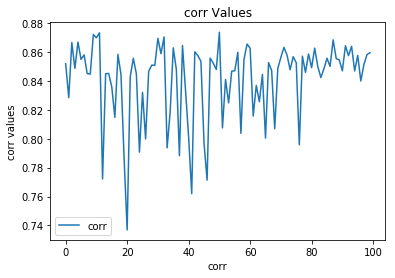

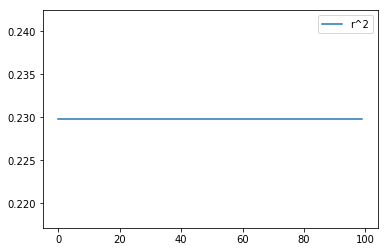

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.random
import pandas as pd
import csv
%matplotlib inline
def analysis():# run the predict 
 params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [20] }
 n_features = train_dataset.get_data_shape()[0]
 def model_builder(model_params, model_dir):
   model = dc.models.MultiTaskRegressor(
     1, n_features, layer_sizes=[1000], dropouts=[.25],
     batch_size=50, **model_params)
   return model

 optimizer = dc.hyper.HyperparamOpt(model_builder)
 best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
     params_dict, train_dataset, valid_dataset, transformers,
     metric=metric)
 dnn_train_csv_out = "dnn_train_regressor.csv"
 dnn_train_stats_out = "dnn_train_regressor_stats.txt"
 dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
 dnn_train_score = dnn_train_evaluator.compute_model_performance(
     [metric], dnn_train_csv_out, dnn_train_stats_out)
 print("DNN Train set R^2 %f" % (dnn_train_score["r2_score"]))

 dnn_valid_csv_out = "dnn_valid_regressor.csv"
 dnn_valid_stats_out = "dnn_valid_regressor_stats.txt"
 dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
 dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
     [metric], dnn_valid_csv_out, dnn_valid_stats_out)
 print("DNN Valid set R^2 %f" % (dnn_valid_score["r2_score"]))

 dnn_test_csv_out = "dnn_test_regressor.csv"
 dnn_test_stats_out = "dnn_test_regressor_stats.txt"
 dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
 dnn_test_score = dnn_test_evaluator.compute_model_performance(
     [metric], dnn_test_csv_out, dnn_test_stats_out)
 print("DNN Test set R^2 %f" % (dnn_test_score["r2_score"]))

 dnn_crystal_csv_out = "dnn_crystal_regressor.csv"
 dnn_crystal_stats_out = "dnn_crystal_stats_regressor.txt"
 dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
 dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
     [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
 print("DNN Crystal set R^2 %f" % (dnn_crystal_score["r2_score"]))

 polarss = pd.read_csv("dnn_crystal_regressor.csv")
 polarsss = pd.read_csv("crystal_desc_canvas_aug30.csv",usecols=[17])
 del polarss['Compound']
 polarss.columns = ['Polar2']
 result = pd.concat([polarsss, polarss], axis=1)
 result_f = result.corr()
 g = np.array(result_f)
 fgfgf = g[0,1:2]
 ufc=fgfgf.tolist()
 mma=ufc[0]
 return mma

def real_analysis(number):#analysis the corr and process the value to plot
 fileHeader = ["corr"]
 values1 = [(dnn_crystal_score["r2_score"]) for y in range(number)]
 values = [analysis() for x in range(number)]
 n = [values]
 n2 = [values1]
 m = np.array(n) 
 m2 = np.array(n2)
 csvFile = open("test.csv", "w")
 #csvFile = open("test_r^2","w")
 writer = csv.writer(csvFile)
 writer.writerow(fileHeader)
 writer.writerow(n)
 csvFile.close()
#data = pd.read_csv("test.csv")
 mrrr = np.transpose(m)
 mrrr1 = np.transpose(m2)
 mrrre1 = pd.DataFrame(mrrr1)
 mrrre = pd.DataFrame(mrrr)
 mrrre.columns = ['corr']
 mrrre1.columns = ['r^2']

 normals = pd.DataFrame(mrrre['corr'])
 normals.plot()
 plt.xlabel('corr')
 plt.ylabel('corr values')
 plt.title('corr Values')
 normals2 = pd.DataFrame(mrrre1['r^2']) 
 normals2.plot()
real_analysis(100)
